In [2]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # testとtrain分割
from decimal import Decimal, ROUND_HALF_UP
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [3]:
# データセットインポート（iris)
iris = load_iris()
#print(iris)

# Xに格納
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 目的変数(ラベル：target)をyに格納
y = pd.DataFrame({ "Species" : iris.target})

# Xとyを結合
df = pd.concat([X, y], axis=1, sort=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# virgicolorとvirginicaデータのみ（setosaは削除）
df = df[df['Species'].isin(['1','2'])]

# 数値を０、１に置き換え
df = df.replace({1: 0, 2: 1})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [5]:
# X,yに分割
X = df.loc[:,["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
display(X.head())

y = df.loc[:,["Species"]]
display(y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


,Species
50,0
51,0
52,0
53,0
54,0


In [6]:
# np.arrayに変換
X = np.array(X)
y = np.array(y)
y = y.reshape(-1,)

#trainとtestに分ける
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

#X_train = np.insert(X_train, 0, 1, axis=1)

print(type(X_train))
print("X_train")
print(X_train.shape)
print(X_train[:4])
print("y_train")
print(y_train.shape)
#print(y_train[:4])

print("X_test")
print(X_test.shape)
#print(X_test[:4])
print("y_test") 
print(y_test.shape)
#print(y_test[:4])


<class 'numpy.ndarray'>
X_train
(75, 4)
[[-1.77029021 -0.93785213 -2.29778941 -0.75792766]
 [ 0.03817879  1.08628915 -0.24187257  0.09816533]
 [-0.56464421  0.32723617  0.24187257  0.44060252]
 [ 0.18888454 -0.17879915  0.84655399  1.12547691]]
y_train
(75,)
X_test
(25, 4)
y_test
(25,)


### 【問題１】
class内　def　hypothesis_function():　に記載

### 【問題2】最急降下法
class内　fit():　に記載

### 【問題3】推定
class内　predict(self, X)、predict_proba(self, X)に記載

### 【問題4】目的関数

In [7]:
def loss(X, y, coef, lamda):
    y_proba = sigmoid(X, coef)
    m = len(X)
    
    iner_sigma = -y*(np.log(y_proba))-(1-y)*(np.log(1-y_proba))
    sigma = np.sum(iner_sigma)/m
    lamda_add = lamda/(2*m)*np.sum(coef[1:]**2)
    return loss

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [32]:
class ScratchLogisticRegression():
    def __init__(self, num_iter=30, lr=0.01, bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _sigmoid(self, X,theta):
        h1 = 1 / (1 + np.exp(-(X@theta))) #(sample_num * 1) = (sample_num * feature_num) * (feature_num * 1)
        return h1#(sample_num * 1)
    
    def _gradientdescent(self, X, y, m, theta):
        norm_theta = theta.copy()
        norm_theta[0] = 0
        
        error = (self._sigmoid(X, theta) - y)# (nsample,1) = (nsample,1) - (nsample,1)
        errorX = (error@X)/m # (1,nfeature) = (1,nsample)@(nsample,nfeatrure)
        norm = (self.lamda / m) * norm_theta #(1, n feature)
        gradient = errorX + norm #(1,nfeature) = (1,nfeature) - (1,nfeature)
        
        theta_out = theta - self.lr * gradient #(1, nfeature) = (1,nfeature) - (1,nfeature)
        
        return theta_out
    
    def _cost(self, X, y, m, theta):
        step1 = self._sigmoid(X, theta)
        step2 = np.log(step1)
        step3 = -y * step2
        
        step4 = 1 - step1
        step5 = np.log(step4)
        step6 = (1-y) * step5
        
        step7 = step3 - step6
        step8 = np.sum(step7)
        step9 = 1/m * step8
        
        step10 = self.theta ** 2
        step11 = np.sum(step10)
        step12 = self.lamda / (2*m)
        step13 = step12 * step11
        
        step14 = step9 * step13
        
        return step14
    
    def fit(self, X, y, lamda=1, X_val=np.array([]), y_val=np.array([])):
        self.lamda = lamda
        m = len(X)
        
        if self.bias:
            self.theta = np.random.rand(X.shape[1])
        else:
            X = np.insert(X, 0, 1, axis=1)
            self.theta = np.random.rand(X.shape[1])
            
        for i in range(self.iter):
            self.theta = self._gradientdescent(X, y, m, self.theta)
            self.loss[i] = self._cost(X, y, m, self.theta)
            
        if X_val.size != 0:
            if self.bias:
                self.theta_val = np.random.rand(X_val.shape[1])
            else:
                X_val = np.insert(X_val, 0, 1, axis=1)
                self.theta_val = np.random.rand(X_val.shape[1])
                
            m_val = len(X_val)
            
            for i in range(self.iter):
                self.theta_val = self._gradientdescent(X_val, y_val, m_val, self.theta_val)
                self.val_loss[i] = self._cost(X_val, y_val, m_val, self.theta_val)
                
        if self.verbose:
            print("loss:", self.loss)
            print("val_loss:", self.val_loss)
            
    def predict(self, X):
        if self.bias == False:
            X = np.insert(X, 0, 1, axis=1)
            
        pred_proba = self._sigmoid(X, self.theta)
        result = []
        
        for i in pred_proba:
            if i > 0.5:
                result.append(1)
            else:
                result.append(0)
                
        return result
    
    def predict_proba(self, X):
        if self.bias == False:
            X = np.insert(X, 0, 1, axis=1)
            
        pred_proba = self._sigmoid(X, self.theta)
        return pred_proba
                

## スクラッチしたScratchLogisticRegressionで学習、推定

In [33]:
slr = ScratchLogisticRegression(num_iter=3000, lr=0.01)
slr.fit(X_train, y_train, X_val= X_test, y_val=y_test)
slr_predict = slr.predict(X_test)
slr_proba = slr.predict_proba(X_test)

In [34]:
print('y_pred:\n',slr_predict,'\n')
print('y_proba:\n',slr_proba[:10],'\n')

print("accuracy:", accuracy_score(slr_predict, y_test))
print("recall:", recall_score(slr_predict, y_test))
print("precision:", precision_score(slr_predict, y_test))
print("F1:", f1_score(slr_predict, y_test))
print("matrix:\n", confusion_matrix(slr_predict, y_test))

y_pred:
 [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0] 

y_proba:
 [0.42862366 0.9549706  0.4772652  0.99680751 0.96747267 0.98050077
 0.2335722  0.66974999 0.97408396 0.89424558] 

accuracy: 0.88
recall: 0.8461538461538461
precision: 0.9166666666666666
F1: 0.8799999999999999
matrix:
 [[11  1]
 [ 2 11]]


## scikit-learnのLogisticRegressionで学習、推定

In [36]:
from sklearn.linear_model import LogisticRegression
#初期化、学習、推定
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_sk = model.predict(X_test)
y_proba_sk = model.predict_proba(X_test)

print('y_pred:\n',y_pred_sk,'\n')
print('y_proba:\n',y_proba_sk[:10],'\n')

print("accuracy:", accuracy_score(y_pred_sk, y_test))
print("recall:", recall_score(y_pred_sk, y_test))
print("precision:", precision_score(y_pred_sk, y_test))
print("F1:", f1_score(y_pred_sk, y_test))
print("matrix:\n", confusion_matrix(y_pred_sk, y_test))


y_pred:
 [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0] 

y_proba:
 [[0.6345729  0.3654271 ]
 [0.0294102  0.9705898 ]
 [0.6029293  0.3970707 ]
 [0.00134983 0.99865017]
 [0.02096354 0.97903646]
 [0.01136684 0.98863316]
 [0.77745735 0.22254265]
 [0.31257353 0.68742647]
 [0.01352453 0.98647547]
 [0.09991446 0.90008554]] 

accuracy: 0.88
recall: 0.8461538461538461
precision: 0.9166666666666666
F1: 0.8799999999999999
matrix:
 [[11  1]
 [ 2 11]]


## 【問題7】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

<function matplotlib.pyplot.show(*args, **kw)>

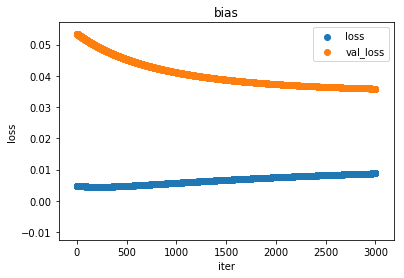

In [37]:
plt.scatter(np.array(range(slr.iter)), slr.loss, label="loss")
plt.scatter(np.array(range(slr.iter)), slr.val_loss, label="val_loss")

plt.title("bias")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

plt.show

## 【問題8】決定領域の可視化
決定領域を可視化してください。

In [47]:
# データの準備
# versicolor と virginicaのみを抜き出す
iris_versicolor1 = df[df.Species == 1]
iris_virginica2 = df[df.Species == 2]

# sepal length と petal length のみを抜き出す
X_train_plot = X_train[:, [0, 2]]
X_test_plot = X_test[:,[0, 2]]

In [48]:
# 学習
slr_plot = ScratchLogisticRegression(num_iter=3000, lr=0.01, bias=False, verbose=False)
slr_plot.fit(X_train_plot, y_train)

In [49]:
# 回帰直線の式
xrange = np.arange(4,9,0.1)
by = -(slr_plot.theta[0]+slr_plot.theta[1]*xrange)/slr_plot.theta[2]

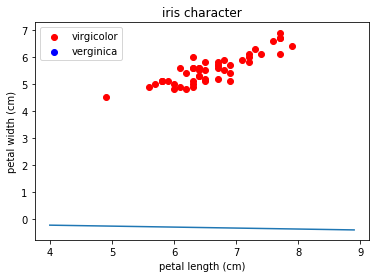

In [50]:
plt.scatter(iris_versicolor1["sepal length (cm)"], iris_versicolor1["petal length (cm)"], c="red", label="virgicolor")
plt.scatter(iris_virginica2["sepal length (cm)"], iris_virginica2["petal length (cm)"], c="blue", label="verginica")
plt.plot(xrange, by)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("iris character")
plt.legend()
plt.show()

### 決定領域上手く出てない？？